# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

This IPython notebook contains code for Udacity's Self Driving Car Nanodegree: Project 2: Build a Traffic Sign Recognition Classifier. [write up](https://github.com/kambliketan/Self_Driving_Car_Traffic_Sign_Classifier/blob/master/writeup.md) complements this notebook and provides an overview and summary of the project.

## Step 0: Load The Data

In [2]:
# Load pickled data downloaded from: 
# https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip

import pickle

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# pickled data contains keys(['labels', 'features', 'sizes', 'coords'])
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Below is the basic data summary. I used python and numpy methods to calculate the data summary. 

### Basic Summary of the Data Set Using Python and Numpy

In [3]:
import numpy as np

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Shape of a traffic sign image.
image_shape = X_train[0].shape

# Number of unique classes/labels in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
import csv

label_strings = []
csvFile = open('signnames.csv')
reader = csv.reader(csvFile)
for row in reader:
    label_strings.append(row[1])

label_strings.remove('SignName')

print('Total number of label strings: ', len(label_strings))

Total number of label strings:  43


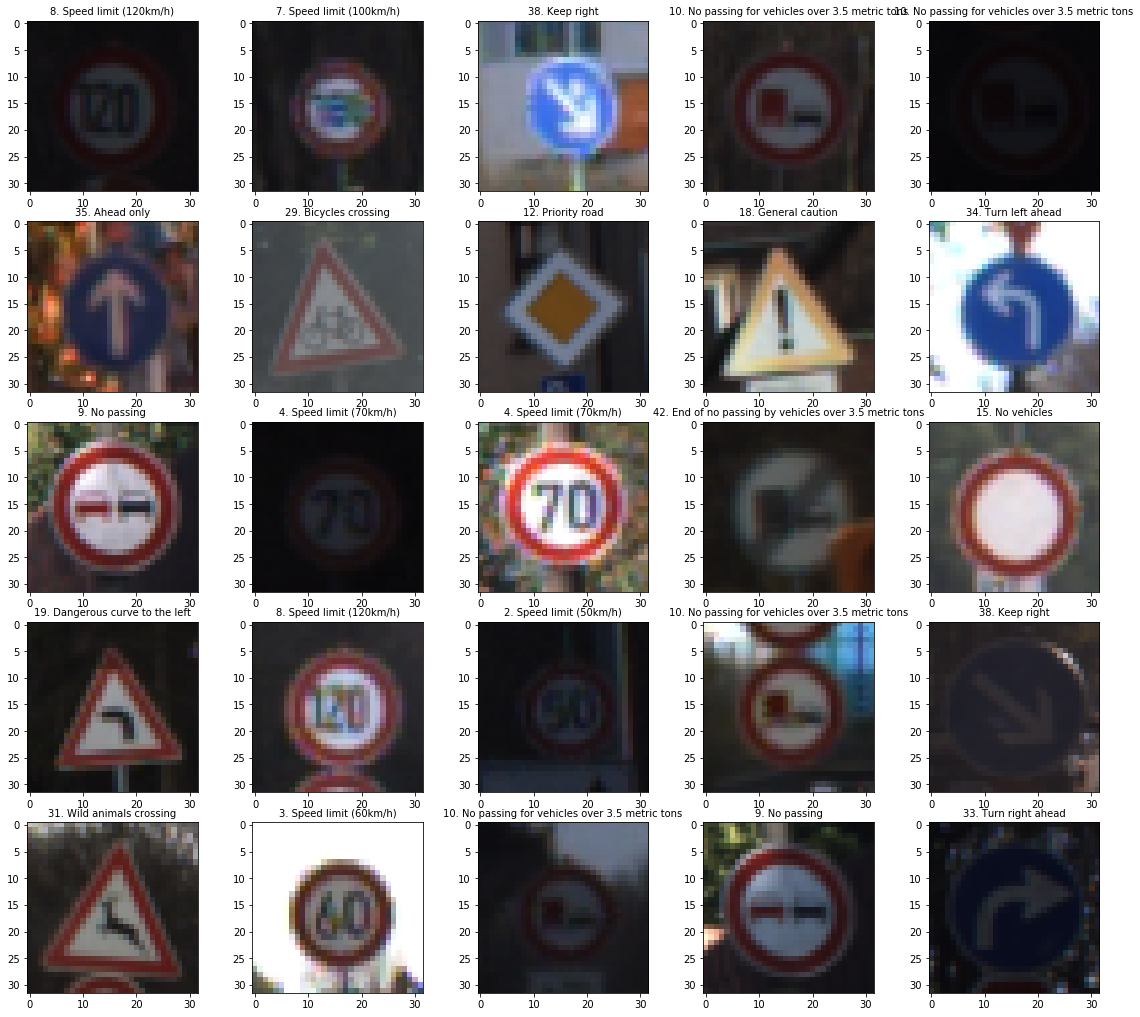

In [5]:
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

# Visualize images:
fig, list_ax = plt.subplots(5, 5, figsize=(15,15))
fig.tight_layout()
for i in range(5):
    for j in range(5):
        index = random.randint(0, len(X_train))
        img = X_train[index]
        list_ax[i][j].imshow(img)
        title = str(y_train[index]) + '. ' + label_strings[y_train[index]]
        list_ax[i][j].set_title(title, fontsize=10)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


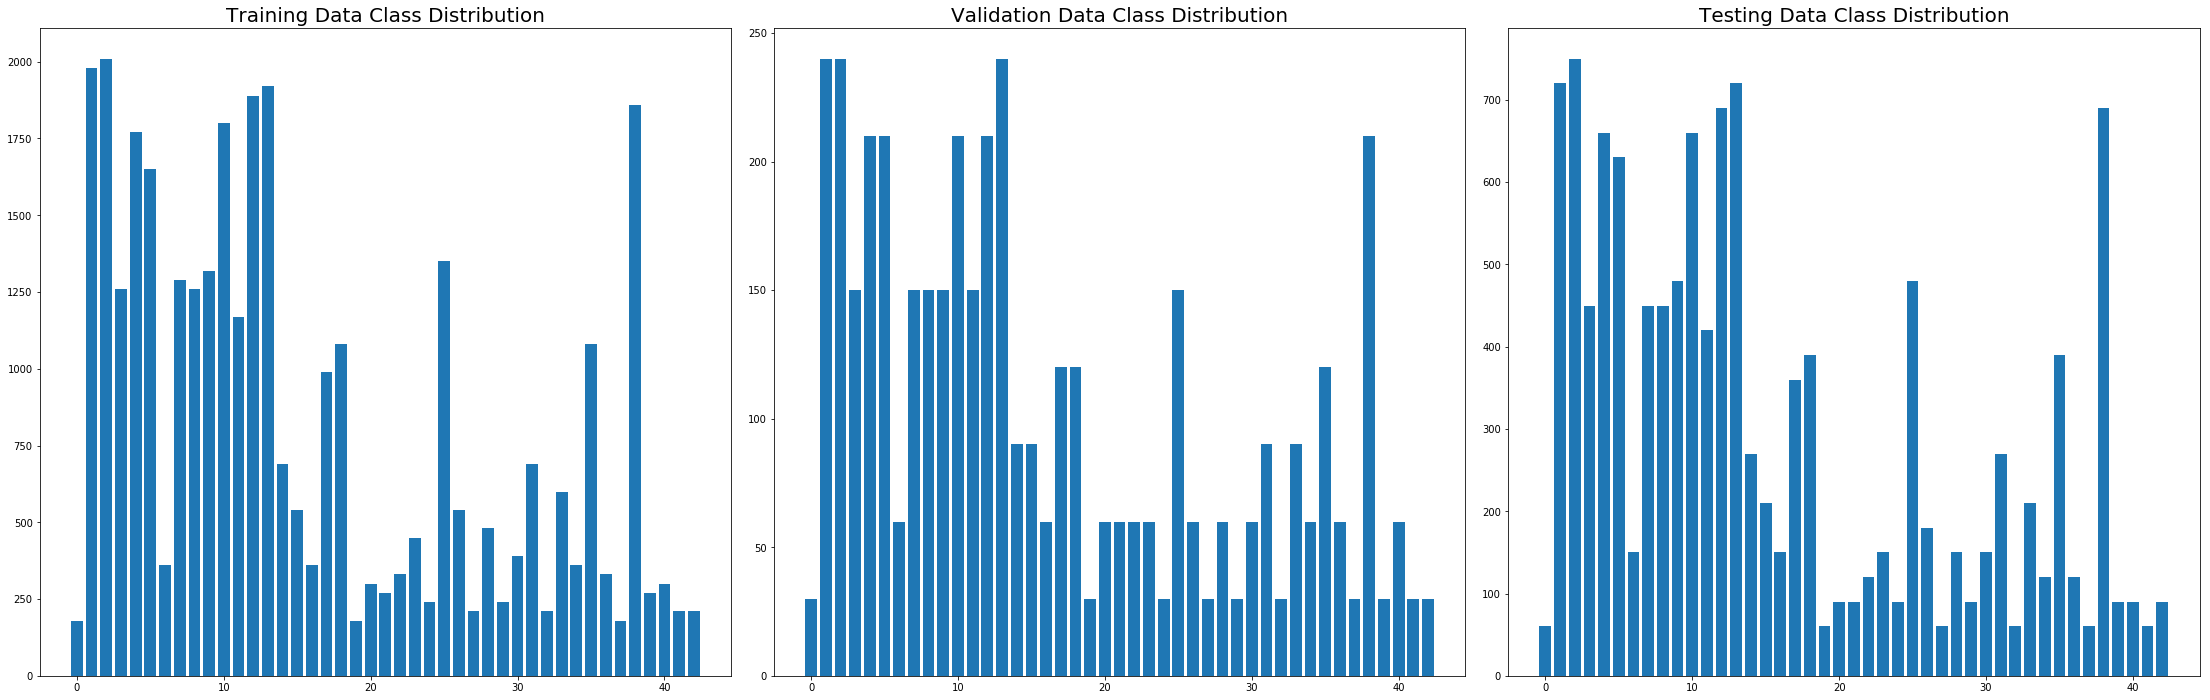

In [6]:
# Histogram of number of images in each class:

fig, list_ax = plt.subplots(1, 3, figsize=(30,10))
fig.tight_layout()

train_hist = np.histogram(y_train, bins=range(44))
valid_hist = np.histogram(y_valid, bins=range(44))
test_hist = np.histogram(y_test, bins=range(44))

list_ax[0].bar(train_hist[1][0:43], train_hist[0])
list_ax[0].set_title('Training Data Class Distribution', fontsize=20)
list_ax[1].bar(valid_hist[1][0:43], valid_hist[0])
list_ax[1].set_title('Validation Data Class Distribution', fontsize=20)
list_ax[2].bar(test_hist[1][0:43], test_hist[0])
list_ax[2].set_title('Testing Data Class Distribution', fontsize=20)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#print(sum(train_hist[0]))
#print(y_train.shape)
#print(train_hist[0])
#print(train_hist[1])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Preprocessing: GrayScale

In [7]:
#### Ignore: Testing

input_shape = X_train.shape
print(input_shape)

output_shape = input_shape[:-1]
print(output_shape)

output_shape = input_shape
output_shape = (input_shape[0], input_shape[1], input_shape[2], 1)
print(output_shape)

(34799, 32, 32, 3)
(34799, 32, 32)
(34799, 32, 32, 1)


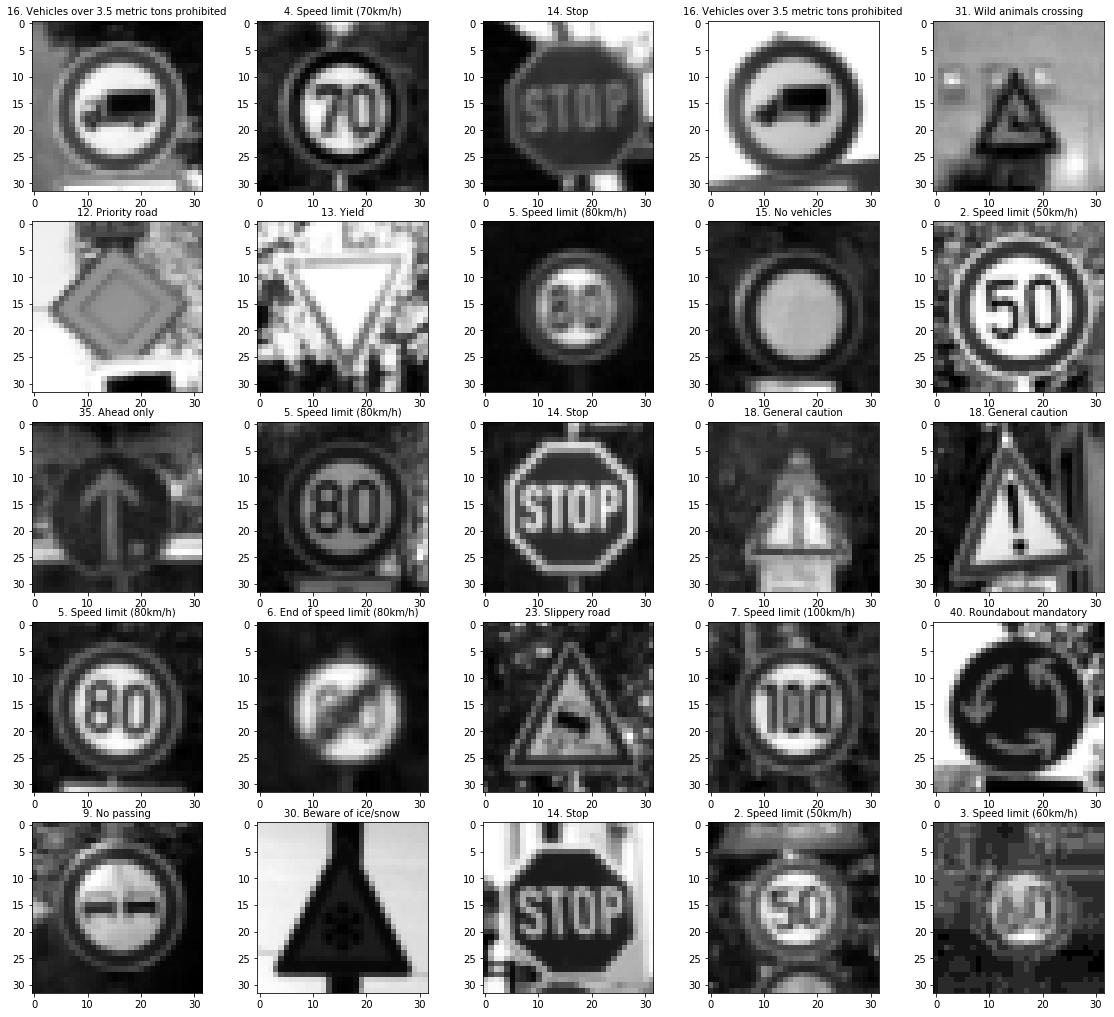

In [8]:
import cv2

def convert_dataset_to_gray(image_data):
    data_shape = image_data.shape
    data_shape = data_shape[:-1]
    image_data_gray = np.zeros(data_shape, np.float)
    #print(X_train_gray.shape)
    
    for i in range(data_shape[0]):
        image_data_gray[i] = cv2.cvtColor(image_data[i], cv2.COLOR_RGB2GRAY)
        
    return image_data_gray

X_train_gray = convert_dataset_to_gray(X_train)
X_valid_gray = convert_dataset_to_gray(X_valid)
X_test_gray = convert_dataset_to_gray(X_test)

# Visualize training data after conversion to Grayscale
fig, list_ax = plt.subplots(5, 5, figsize=(15,15))
fig.tight_layout()
for i in range(5):
    for j in range(5):
        index = random.randint(0, len(X_train_gray))
        img = X_train_gray[index]
        list_ax[i][j].imshow(img, cmap='gray')
        title = str(y_train[index]) + '. ' + label_strings[y_train[index]]
        list_ax[i][j].set_title(title, fontsize=10)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

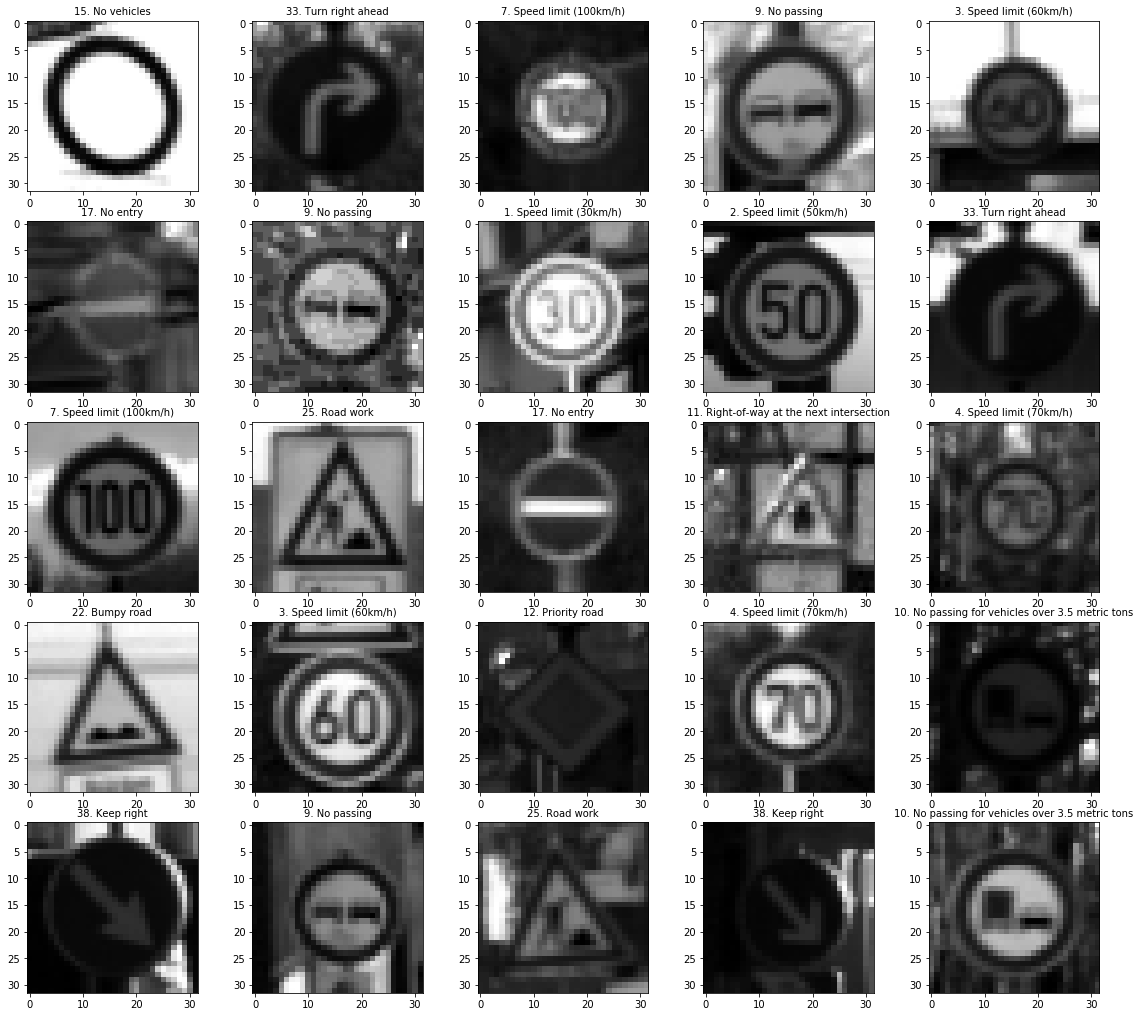

In [9]:
import cv2

def convert_dataset_to_y_channel(image_data):
    input_shape = image_data.shape
    output_shape = (input_shape[0], input_shape[1], input_shape[2])
    image_data_gray = np.zeros(output_shape, np.float)
    #print(X_train_gray.shape)
    
    for i in range(input_shape[0]):
        temp = cv2.cvtColor(image_data[i], cv2.COLOR_RGB2YCrCb)
        image_data_gray[i] = temp[:,:,0]
        
    return image_data_gray

X_train_y = convert_dataset_to_y_channel(X_train)
X_valid_y = convert_dataset_to_y_channel(X_valid)
X_test_y = convert_dataset_to_y_channel(X_test)

# Visualize training data after conversion to Grayscale
fig, list_ax = plt.subplots(5, 5, figsize=(15,15))
fig.tight_layout()
for i in range(5):
    for j in range(5):
        index = random.randint(0, len(X_train_y))
        img = X_train_y[index]
        list_ax[i][j].imshow(img, cmap='gray')
        title = str(y_train[index]) + '. ' + label_strings[y_train[index]]
        list_ax[i][j].set_title(title, fontsize=10)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Preprocessing: Normalization

Pixel before normalization 55.0
Pixel after normalization -0.5703125


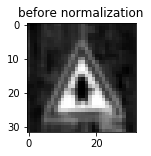

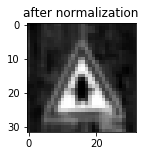

In [10]:
def normalize(image_data):
    image_data = image_data.astype('float64')
    return (image_data - 128) / 128


### Testing - just prooving that normalization does not affect the way image looks

index = 8888
img = X_train_gray[index]

# Print a pixel before normalization
pixel = img[0][0]
print('Pixel before normalization ' + str(pixel))

# Plot image before normalization
plt.figure(figsize=(2,2))
plt.imshow(img, cmap="gray")
plt.title('before normalization')

img_norm = normalize(img)

# print a pixel after normalization
pixel = img_norm[0][0]
print('Pixel after normalization ' + str(pixel))

# Plot normalized image (just out of curiosity)
plt.figure(figsize=(2,2))
plt.imshow(img_norm, cmap="gray")
plt.title('after normalization')


In [11]:
### Gray
# do normalization of all datasets:

X_train_gray_norm = normalize(X_train_gray)
X_valid_gray_norm = normalize(X_valid_gray)
X_test_gray_norm = normalize(X_test_gray)

# testing whether normalization worked:

print(X_train_gray_norm.shape)
print(np.max(X_train_gray_norm))
print(np.min(X_train_gray_norm))

(34799, 32, 32)
0.9921875
-0.9765625


In [12]:
# normalizing rgb images as well:

X_train_rgb_norm = normalize(X_train)
X_valid_rgb_norm = normalize(X_valid)
X_test_rgb_norm = normalize(X_test)

# testing whether normalization worked:

print(X_train_rgb_norm.shape)
print(np.max(X_train_rgb_norm))
print(np.min(X_train_rgb_norm))

(34799, 32, 32, 3)
0.9921875
-1.0


In [13]:
# normalizing Y channel images:

X_train_y_norm = normalize(X_train_y)
X_valid_y_norm = normalize(X_valid_y)
X_test_y_norm = normalize(X_test_y)

print(X_train_y_norm.shape)
print(np.max(X_train_y_norm))
print(np.min(X_train_y_norm))

(34799, 32, 32)
0.9921875
-0.9765625


### Preprocessing: Shuffle

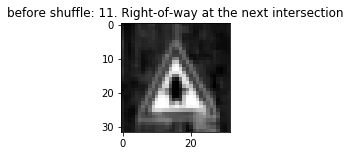

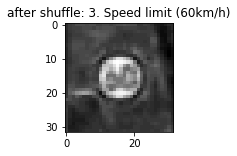

In [14]:
from sklearn.utils import shuffle

index = 8888

# Plot image before normalization
plt.figure(figsize=(2,2))
plt.imshow(X_train_gray_norm[index], cmap="gray")
title = str(y_train[index]) + '. ' + label_strings[y_train[index]]
plt.title('before shuffle: ' + title)

temp_features, temp_labels = shuffle(X_train_gray_norm, y_train)


# Plot image after shuffle
plt.figure(figsize=(2,2))
plt.imshow(temp_features[index], cmap="gray")
title = str(temp_labels[index]) + '. ' + label_strings[temp_labels[index]]
plt.title('after shuffle: ' + title)

### Setup TensorFlow

In [15]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 256

(34799, 32, 32)
(34799, 32, 32, 1)
(4410, 32, 32)
(4410, 32, 32, 1)
(12630, 32, 32)
(12630, 32, 32, 1)


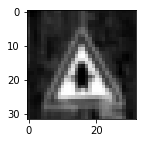

In [16]:
### Gray
### Expand dims

X_train_gray_norm_exp = np.expand_dims(X_train_gray_norm, axis=3)
print(X_train_gray_norm.shape)
print(X_train_gray_norm_exp.shape)

plt.figure(figsize=(2,2))
plt.imshow(X_train_gray_norm_exp[8888].squeeze(), cmap='gray')

X_valid_gray_norm_exp = np.expand_dims(X_valid_gray_norm, axis=3)
print(X_valid_gray_norm.shape)
print(X_valid_gray_norm_exp.shape)

X_test_gray_norm_exp = np.expand_dims(X_test_gray_norm, axis=3)
print(X_test_gray_norm.shape)
print(X_test_gray_norm_exp.shape)

(34799, 32, 32)
(34799, 32, 32, 1)
(4410, 32, 32)
(4410, 32, 32, 1)
(12630, 32, 32)
(12630, 32, 32, 1)


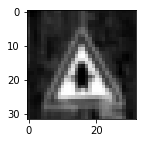

In [17]:
X_train_y_norm_exp = np.expand_dims(X_train_y_norm, axis=3)
print(X_train_y_norm.shape)
print(X_train_y_norm_exp.shape)

plt.figure(figsize=(2,2))
plt.imshow(X_train_y_norm_exp[8888].squeeze(), cmap='gray')

X_valid_y_norm_exp = np.expand_dims(X_valid_y_norm, axis=3)
print(X_valid_y_norm.shape)
print(X_valid_y_norm_exp.shape)

X_test_y_norm_exp = np.expand_dims(X_test_y_norm, axis=3)
print(X_test_y_norm.shape)
print(X_test_y_norm_exp.shape)

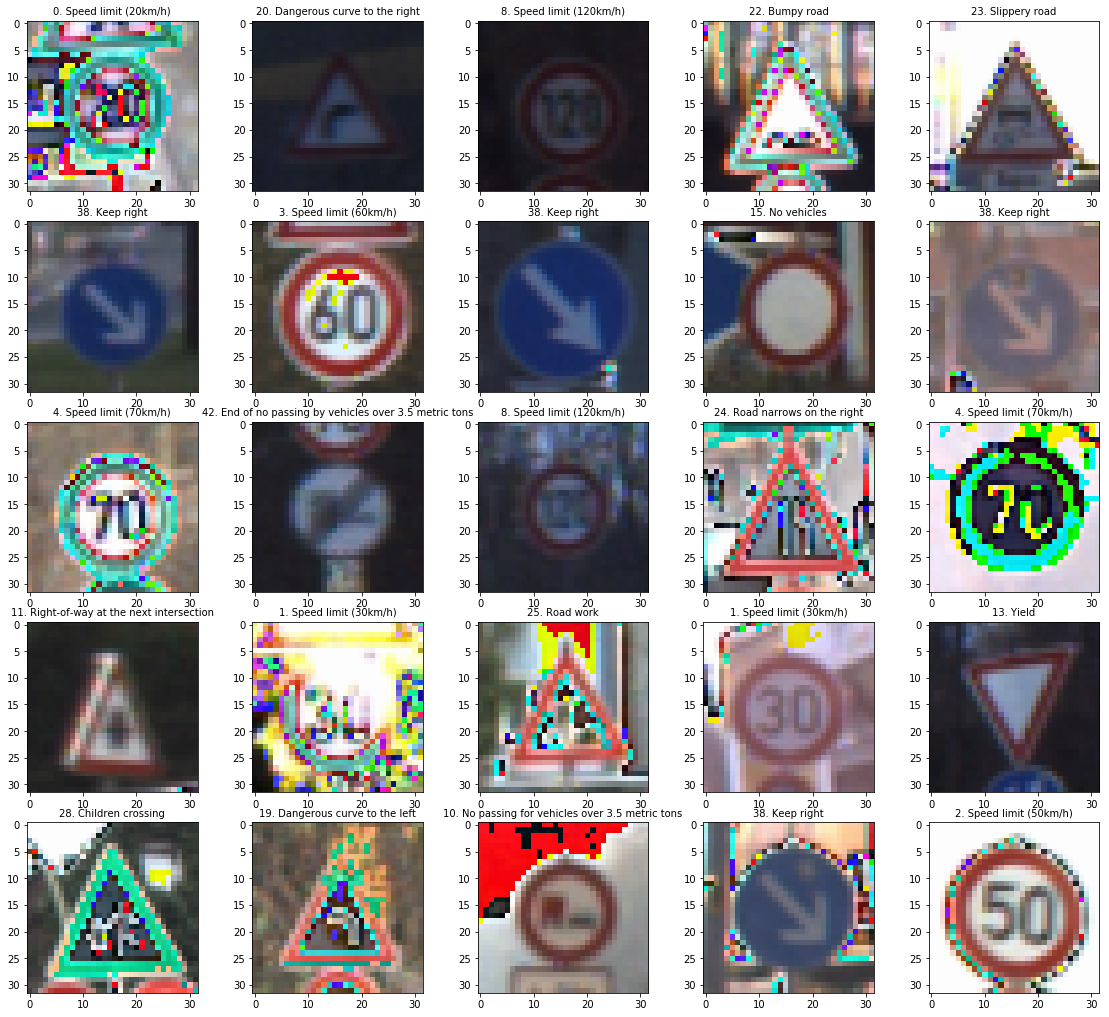

In [18]:
# Visualize training data after conversion to Grayscale
fig, list_ax = plt.subplots(5, 5, figsize=(15,15))
fig.tight_layout()
for i in range(5):
    for j in range(5):
        index = random.randint(0, len(X_train_rgb_norm))
        img = X_train_rgb_norm[index]
        list_ax[i][j].imshow(img)#, cmap='gray')
        title = str(y_train[index]) + '. ' + label_strings[y_train[index]]
        list_ax[i][j].set_title(title, fontsize=10)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Model Architecture

Lets try the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [19]:
### Using the Lenet architecture discussed in lessons.

from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Dropout parameter, probability to keep units
keep_prob = tf.placeholder(tf.float32)

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.002

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Build Evaluation

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver(max_to_keep = 30)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train

In [21]:
from sklearn.utils import shuffle

#y_train_y = y_train
#y_validation_accuracy = []

#y_train_gray = y_train
#gray_validation_accuracy = []

xtrain = X_train_rgb_norm
ytrain = y_train
xvalid = X_valid_rgb_norm

validation_accuracy_list = []
training_accuracy_list = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(xtrain)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        xtrain, ytrain = shuffle(xtrain, ytrain)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = xtrain[offset:end], ytrain[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(xvalid, y_valid)
        training_accuracy = evaluate(xtrain, ytrain)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        validation_accuracy_list.append(validation_accuracy)
        training_accuracy_list.append(training_accuracy)
        
        save_file = './model/rgb_model_20_256_002_' + str(i) + '.ckpt'
        saver.save(sess, save_file)
        
    #saver.save(sess, './lenet')
    #print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.600

EPOCH 2 ...
Validation Accuracy = 0.809

EPOCH 3 ...
Validation Accuracy = 0.863

EPOCH 4 ...
Validation Accuracy = 0.898

EPOCH 5 ...
Validation Accuracy = 0.903

EPOCH 6 ...
Validation Accuracy = 0.917

EPOCH 7 ...
Validation Accuracy = 0.914

EPOCH 8 ...
Validation Accuracy = 0.923

EPOCH 9 ...
Validation Accuracy = 0.932

EPOCH 10 ...
Validation Accuracy = 0.937

EPOCH 11 ...
Validation Accuracy = 0.943

EPOCH 12 ...
Validation Accuracy = 0.941

EPOCH 13 ...
Validation Accuracy = 0.949

EPOCH 14 ...
Validation Accuracy = 0.943

EPOCH 15 ...
Validation Accuracy = 0.944

EPOCH 16 ...
Validation Accuracy = 0.947

EPOCH 17 ...
Validation Accuracy = 0.944

EPOCH 18 ...
Validation Accuracy = 0.947

EPOCH 19 ...
Validation Accuracy = 0.939

EPOCH 20 ...
Validation Accuracy = 0.945



[0.68542199477700239, 0.87956550476958639, 0.91508376678175862, 0.95192390590903575, 0.95721141407827481, 0.96907957112015986, 0.97316014819105601, 0.97841891999484354, 0.98436736674304526, 0.98732722191129729, 0.98706859383604584, 0.9898560302566326, 0.99114917077162867, 0.99080433332254469, 0.99232736563983326, 0.99310324991183385, 0.99376418844455039, 0.99382166163449093, 0.99370671571022151, 0.99514353842587167]

[0.60022675763993039, 0.80861678004535142, 0.86326530612244901, 0.89795918367346939, 0.90317460317460319, 0.91723356009070289, 0.91405895718641561, 0.9233560090702948, 0.93219954648526082, 0.93673469387755104, 0.94263038548752831, 0.94149659863945578, 0.94875283446712022, 0.94308390022675737, 0.94376417233560095, 0.94693877551020411, 0.94353741496598642, 0.94693877551020411, 0.93922902494331062, 0.94535147392290253]


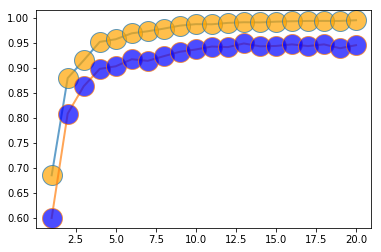

In [22]:
plt.plot(np.arange(20) + 1, training_accuracy_list, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.plot(np.arange(20) + 1, validation_accuracy_list, '-o', ms=20, lw=2, alpha=0.7, mfc='blue')
print(training_accuracy_list)
print()
print(validation_accuracy_list)

In [23]:
selected_save_file = './model/rgb_model_20_256_002_' + str(12) + '.ckpt'
#tf.train.latest_checkpoint('.')

### Test

In [24]:
with tf.Session() as sess:
    saver.restore(sess, selected_save_file)
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.911


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(32, 32, 3)
(5, 32, 32, 3)


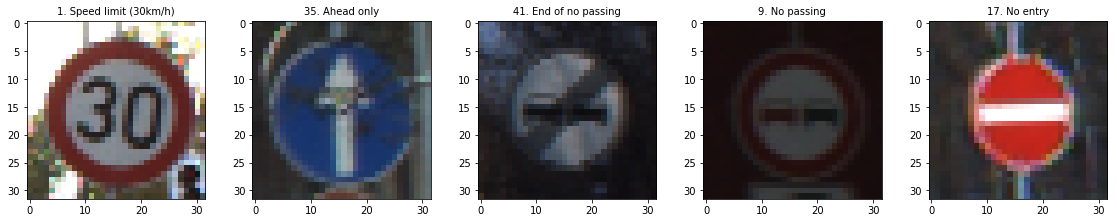

In [51]:
# Plot image before normalization

images = np.zeros((5,32,32,3), dtype=np.int)
labels = np.zeros((5), dtype=np.int)

fig, list_ax = plt.subplots(1, 5, figsize=(15,15))
fig.tight_layout()
for i in range(5):
    index = random.randint(0, len(X_test))
    img = X_test[index]
    images[i] = img
    list_ax[i].imshow(img)
    title = str(y_test[index]) + '. ' + label_strings[y_test[index]]
    labels[i] = y_test[index]
    list_ax[i].set_title(title, fontsize=10)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

print(img.shape)
print(images.shape)

In [52]:
#Preprocessing:

# 1. for rgb, its only normalization:
images_norm = normalize(images)

# testing whether normalization worked:

print(images_norm.shape)
print(np.max(images_norm))
print(np.min(images_norm))

(5, 32, 32, 3)
0.9921875
-0.984375


### Predict the Sign Type for Each Image

In [53]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess, selected_save_file)
    test_predictions = sess.run(tf.argmax(logits, 1), feed_dict={x: images_norm, y: labels, keep_prob: 1.0})
    print('actual labels: ' + str(labels))
    print('predicted label: ' + str(test_predictions))
        


actual labels: [ 1 35 41  9 17]
predicted label: [ 1 35 41  9 17]


### Analyze Performance

In [54]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, selected_save_file)
    test_accuracy = evaluate(images_norm, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [55]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess, selected_save_file)
    top_predictions = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: images_norm, y: labels, keep_prob: 1.0})
    print('actual labels: ' + str(labels))
    print('top probabilities: ' + str(top_predictions[0]))
    print('top labels: ' + str(top_predictions[1]))
    

actual labels: [ 1 35 41  9 17]
top probabilities: [[  9.97478426e-01   2.50469032e-03   8.54593418e-06   8.05215495e-06
    1.03210638e-07]
 [  1.00000000e+00   3.52983837e-10   1.79463111e-10   9.82982862e-11
    5.09400681e-12]
 [  9.99937534e-01   3.85629355e-05   2.03703094e-05   1.82292649e-06
    8.04855688e-07]
 [  9.99991655e-01   7.05725915e-06   7.68563439e-07   5.85547639e-07
    9.72170611e-09]
 [  1.00000000e+00   1.80544040e-16   3.33165976e-18   2.32405806e-23
    7.73781198e-24]]
top labels: [[ 1  0  2  4  5]
 [35 33 37 39 13]
 [41 32 16  9 36]
 [ 9 16 10 20 41]
 [17  9 14 20 12]]


In [56]:
type(top_predictions[1])
print(top_predictions[1][0][0])

preds = top_predictions[1].astype(np.short)
probs = top_predictions[0]

1


In [58]:

#fig, list_ax = plt.subplots(1, 5, figsize=(15,15))
#fig.tight_layout()
for i in range(5):
    #img = images[i].astype(np.byte)
    #list_ax[i].imshow(img)
    title = ''
    for j in range(5):
        #title += str(j) + '. ' + label_strings[preds[i][j]]
        print('| ' + str(np.round(probs[i][j], 10)) + '. ' + '| ' + label_strings[preds[i][j]] + ' |')
    
    #list_ax[i].set_title(title, fontsize=10)
    print()
    print()

#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


| 0.997478. | Speed limit (30km/h) |
| 0.00250469. | Speed limit (20km/h) |
| 8.5459e-06. | Speed limit (50km/h) |
| 8.0522e-06. | Speed limit (70km/h) |
| 1.032e-07. | Speed limit (80km/h) |


| 1.0. | Ahead only |
| 4e-10. | Turn right ahead |
| 2e-10. | Go straight or left |
| 1e-10. | Keep left |
| 0.0. | Yield |


| 0.999938. | End of no passing |
| 3.85629e-05. | End of all speed and passing limits |
| 2.03703e-05. | Vehicles over 3.5 metric tons prohibited |
| 1.8229e-06. | No passing |
| 8.049e-07. | Go straight or right |


| 0.999992. | No passing |
| 7.0573e-06. | Vehicles over 3.5 metric tons prohibited |
| 7.686e-07. | No passing for vehicles over 3.5 metric tons |
| 5.855e-07. | Dangerous curve to the right |
| 9.7e-09. | End of no passing |


| 1.0. | No entry |
| 0.0. | No passing |
| 0.0. | Stop |
| 0.0. | Dangerous curve to the right |
| 0.0. | Priority road |




### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")